# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 568


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Your API Key
api_key = weather_api_key

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ciudad bolivar
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | chonchi
Processing Record 6 of Set 1 | constantia
Processing Record 7 of Set 1 | am timan
Processing Record 8 of Set 1 | ebon
Processing Record 9 of Set 1 | achacachi
Processing Record 10 of Set 1 | bidar
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | toga village
City not found. Skipping...
Processing Record 13 of Set 1 | hamilton
Processing Record 14 of Set 1 | caldwell
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | iskateley
Processing Record 21 of Set 1 | saipan
Proce

Processing Record 39 of Set 4 | brazil
Processing Record 40 of Set 4 | port alfred
Processing Record 41 of Set 4 | port elizabeth
Processing Record 42 of Set 4 | baki
Processing Record 43 of Set 4 | urucara
Processing Record 44 of Set 4 | xai-xai
Processing Record 45 of Set 4 | mount isa
Processing Record 46 of Set 4 | shivpuri
Processing Record 47 of Set 4 | new norfolk
Processing Record 48 of Set 4 | broken hill
Processing Record 49 of Set 4 | lebu
Processing Record 0 of Set 5 | ilulissat
Processing Record 1 of Set 5 | syzran'
Processing Record 2 of Set 5 | puerto baquerizo moreno
Processing Record 3 of Set 5 | kapuskasing
Processing Record 4 of Set 5 | tazacorte
Processing Record 5 of Set 5 | rongelap
Processing Record 6 of Set 5 | acapulco de juarez
Processing Record 7 of Set 5 | walvis bay
Processing Record 8 of Set 5 | sao joao da barra
Processing Record 9 of Set 5 | tongren
Processing Record 10 of Set 5 | geraldton
Processing Record 11 of Set 5 | siwa oasis
Processing Record 12 

Processing Record 31 of Set 8 | heunghae
Processing Record 32 of Set 8 | qasr-e qand
City not found. Skipping...
Processing Record 33 of Set 8 | amberieu-en-bugey
Processing Record 34 of Set 8 | mysen
Processing Record 35 of Set 8 | qui nhon
Processing Record 36 of Set 8 | mariehamn
Processing Record 37 of Set 8 | taltal
Processing Record 38 of Set 8 | beinamar
Processing Record 39 of Set 8 | sukumo
Processing Record 40 of Set 8 | mitchell
Processing Record 41 of Set 8 | alaghsas
Processing Record 42 of Set 8 | basse-terre
Processing Record 43 of Set 8 | ambilobe
Processing Record 44 of Set 8 | sirte
Processing Record 45 of Set 8 | ylitornio
Processing Record 46 of Set 8 | darhan
Processing Record 47 of Set 8 | ndele
Processing Record 48 of Set 8 | as samawah
Processing Record 49 of Set 8 | byford
Processing Record 0 of Set 9 | kayangel
Processing Record 1 of Set 9 | enterprise
Processing Record 2 of Set 9 | villa nueva
Processing Record 3 of Set 9 | belyy yar
Processing Record 4 of Se

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          540
Lat           540
Lng           540
Max Temp      540
Humidity      540
Cloudiness    540
Wind Speed    540
Country       540
Date          540
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ciudad bolivar,8.1222,-63.5497,30.95,58,79,3.74,VE,1689873220
1,adamstown,-25.0660,-130.1015,22.75,81,99,15.33,PN,1689873221
2,papatowai,-46.5619,169.4708,5.62,71,6,7.52,NZ,1689873221
3,port-aux-francais,-49.3500,70.2167,1.79,59,58,17.73,TF,1689873221
4,chonchi,-42.6128,-73.8092,13.40,83,82,4.62,CL,1689873221


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ciudad bolivar,8.1222,-63.5497,30.95,58,79,3.74,VE,1689873220
1,adamstown,-25.0660,-130.1015,22.75,81,99,15.33,PN,1689873221
2,papatowai,-46.5619,169.4708,5.62,71,6,7.52,NZ,1689873221
3,port-aux-francais,-49.3500,70.2167,1.79,59,58,17.73,TF,1689873221
4,chonchi,-42.6128,-73.8092,13.40,83,82,4.62,CL,1689873221


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

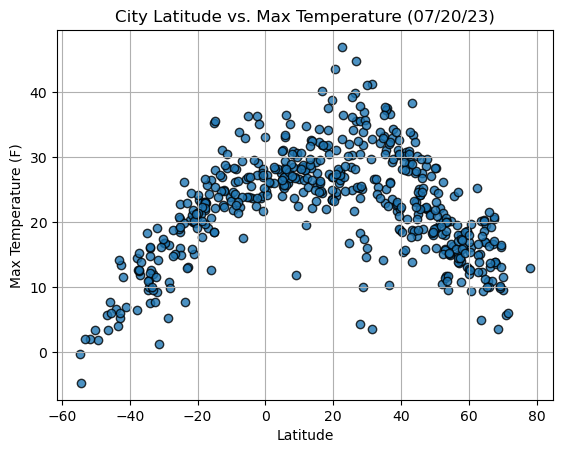

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

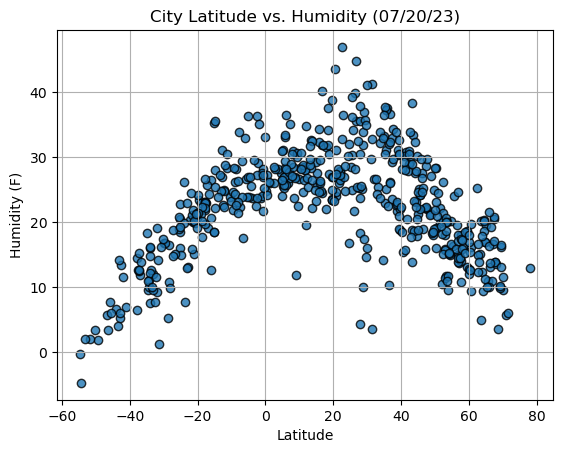

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

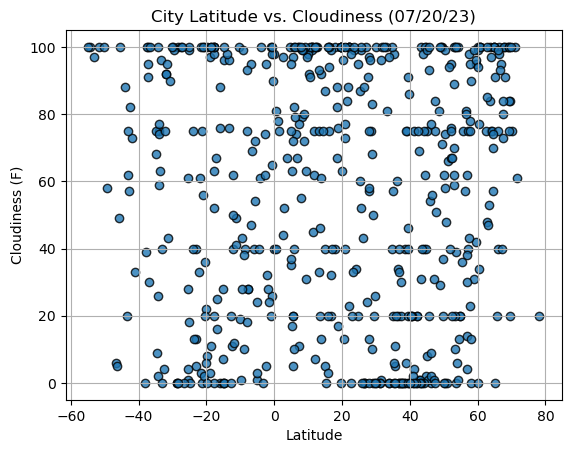

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

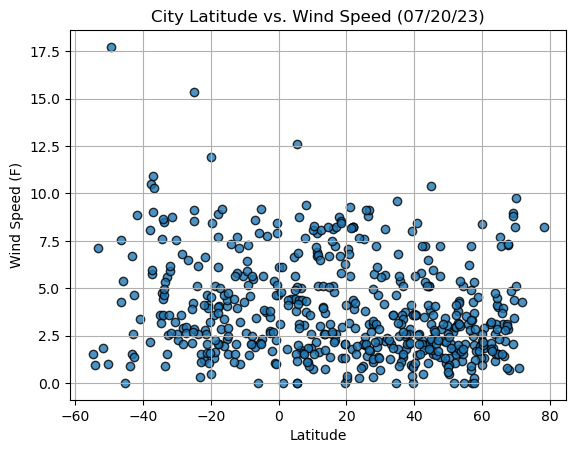

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    # Get the limits of the current plot and use them to calculate relative position
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()
    x_text = xlim[0] + (xlim[1] - xlim[0])*0.5 # 50% from the left
    y_text = ylim[0] + (ylim[1] - ylim[0])*0.05 # 5% from the bottom
    plt.annotate(line_eq,(x_text, y_text),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ciudad bolivar,8.1222,-63.5497,30.95,58,79,3.74,VE,1689873220
5,constantia,44.1833,28.6500,27.61,66,40,6.51,RO,1689873221
6,am timan,11.0297,20.2827,24.70,76,99,2.17,TD,1689873221
7,ebon,4.5820,168.6964,27.60,82,100,6.64,MH,1689873221
9,bidar,17.9000,77.5500,21.99,93,100,8.78,IN,1689873221


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,22.75,81,99,15.33,PN,1689873221
2,papatowai,-46.5619,169.4708,5.62,71,6,7.52,NZ,1689873221
3,port-aux-francais,-49.3500,70.2167,1.79,59,58,17.73,TF,1689873221
4,chonchi,-42.6128,-73.8092,13.40,83,82,4.62,CL,1689873221
8,achacachi,-16.0500,-68.6833,12.56,31,0,3.38,BO,1689873221


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.38873190328463725


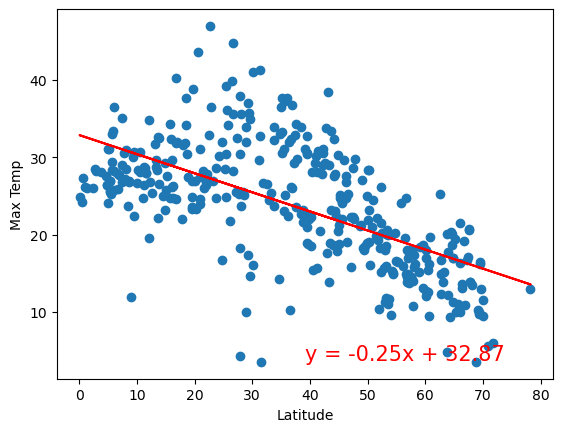

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title = "Max Temp"
text_coordinates = (0, -20)
plot_linear_regression(x_values, y_values, title, text_coordinates)

The r-value is: 0.7498453767226341


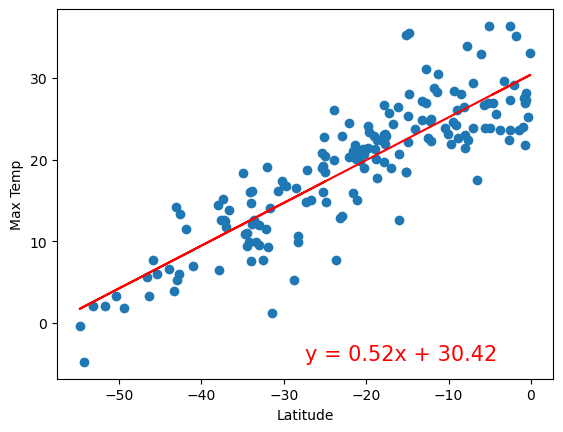

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
title = "Max Temp"
text_coordinates = (-50, 90)
plot_linear_regression(x_values, y_values, title, text_coordinates)

There is quite moderate relationship even moderate to storng in Southern Hemisphere, so that whilst Latitude decreasass, temperature levels tend to increase as well, however much weaker trend is modelled in the Northern Hemisphere

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0016556042529065483


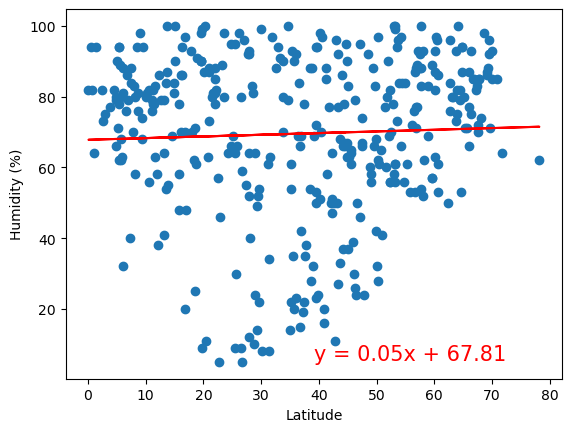

In [18]:
# Northern Hemisphere
north_humidity = northern_hemi_df["Humidity"]
north_latitude = northern_hemi_df["Lat"]
plot_linear_regression(north_latitude, north_humidity, 'Humidity (%)', (50,20))

The r-value is: 0.02332093221155373


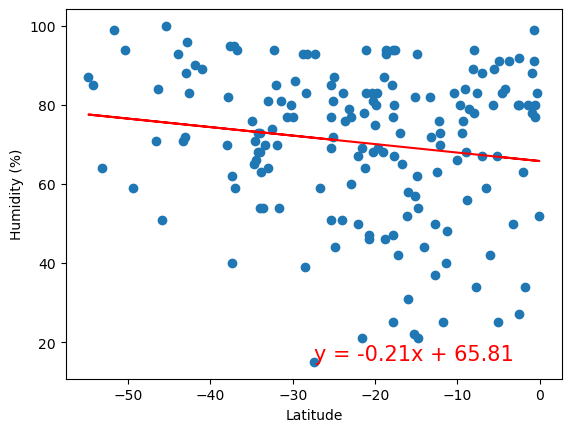

In [19]:
# Southern Hemisphere
south_humidity = southern_hemi_df["Humidity"]
south_latitude = southern_hemi_df["Lat"]
plot_linear_regression(south_latitude, south_humidity, 'Humidity (%)', (-50,20))

No Relationship whatsoever that could be defined as meaningful in terms of making assumptions or suggestions


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0007090035135447572


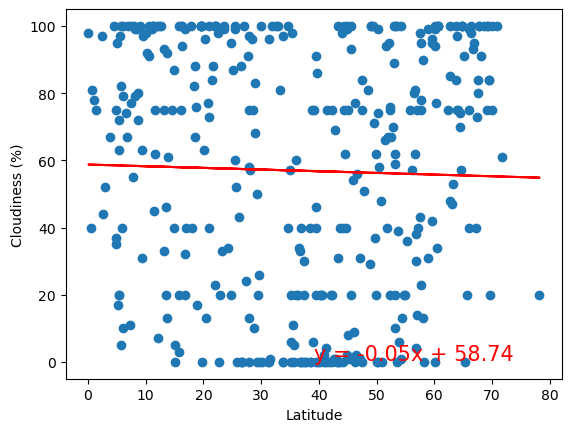

In [20]:
# Northern Hemisphere
north_cloudiness = northern_hemi_df["Cloudiness"]
plot_linear_regression(north_latitude, north_cloudiness, 'Cloudiness (%)', (50,30))

The r-value is: 0.02877146014806909


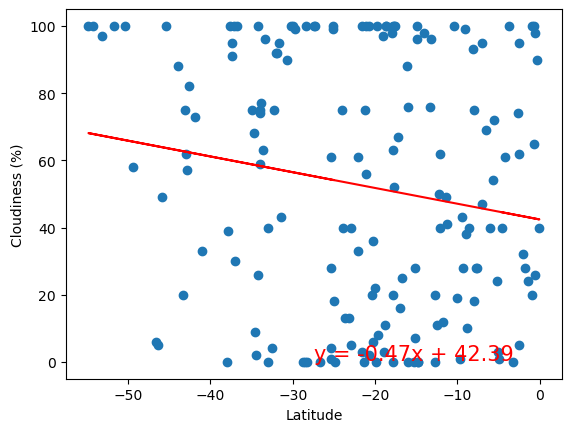

In [21]:
# Southern Hemisphere
south_cloudiness = southern_hemi_df["Cloudiness"]
plot_linear_regression(south_latitude, south_cloudiness, 'Cloudiness (%)', (-50,30))

No meaningful trend could be modelled in terms of making assumption or sugesstions

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02808483836582995


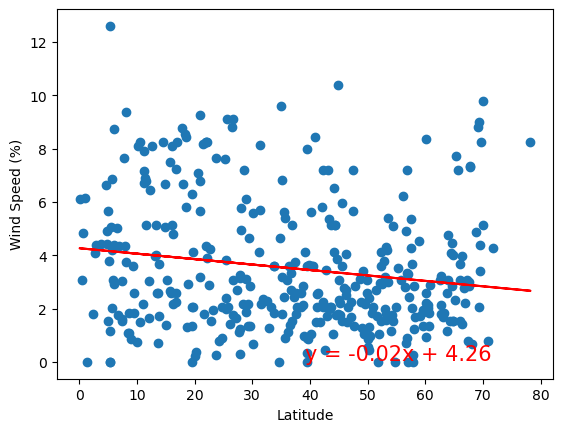

In [22]:
# Northern Hemisphere
northern_windspeed = northern_hemi_df['Wind Speed']
plot_linear_regression(north_latitude, northern_windspeed, 'Wind Speed (%)', (0, 25))

The r-value is: 0.011505024011210764


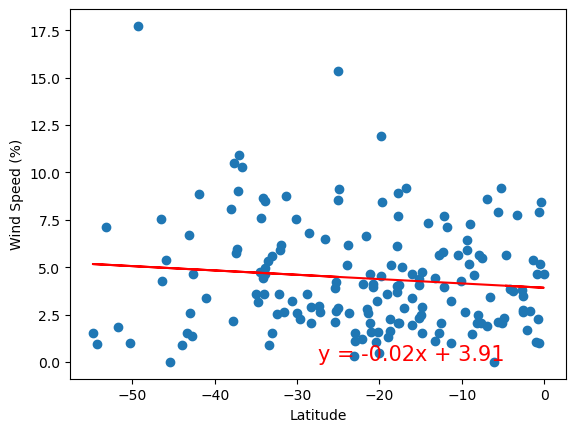

In [23]:
# Southern Hemisphere
southern_windspeed = southern_hemi_df['Wind Speed']
plot_linear_regression(south_latitude, southern_windspeed, 'Wind Speed (%)', (50, 20))

**Discussion about the linear relationship:** Whilst looking at linear relationships depicted in the graphs above, we are mainly assessing the effects of Latitude on Temperature levels, Wind speed, Humidity or Cloudiness. It is notable to highlight that, the strongest relationship observed in the above mention regressions, was between Temperature and Latitude. In Northern Hemisphere, the relationship was more weaker compared to one in the Southern, however it is also interesting that relationship between Temperature levels and Latitude in Northern and Southern Hemispheres, were exactly the same. Meaning we have relationship in Northern hemisphere, where, if Latitude is increased Temperature seems to decerase as well, in a weakly to moderately correlated manner. However, when increasing Latitude in Southern Hemisphere, Temperature levels tend to decreas as well, but showing stronger correlation between the two factors. There could be no meaningful relationship determined between the Humidity levels and Latitude, as well as in terms of cloudiness. The relationship between Wind speed and Latitude, could be defined as somewhat more formulated. However, Lower Latitude in southern Hemisphere means smaller Wind speeds, whereas the best fit line for Northern hemisphere indicates one might see less wind speed as Latitude increases. Nevertheless, it is also important to note that these relationships are also very weak or maybe even non existent, in the sense of making assumptions or pedictions.s